<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/MCP_Python_modelling_of_biomass_for_waste_to_energy_through_anaerobic_digestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print ("Python codes to generally describe or analyse biogas trial data")

Python codes to generally describe or analyse biogas trial data


In [3]:
print ("Introduction")

Introduction


In [4]:
# Python codes to generally describe or analyse biogas trial data: Introduction
#This code is to also apply the Gompertz model to be able to actually
#The code has two distinct goals
#Goal one is to implement stastical analysis in python
#Goal two is to implement Gompertz modelling in python
#In later part of career, the goal will be to implement ADM1 in python
#The statistical analysis will actually include:
#Descriptive analysis
#Regression analysis
#General analyis that validates experimental data
#Gompertz modelling will attemp first to see how the Gompertz modell fits to the given data sets
#Later, the Gompertz model will be modified to fit or describe the experimental models better
#Four different python packages will be used
#Google colabs, Jupyter Notebook, Visual Basic Studio, PyCharm Community
#Full data set in a trial will be treated separately, but for each sample, it will more or less represent a unique data set
#The full data sets are:
# a. Biogas yield data in ml/g oTS for HM, NHMM, YCPM, HPC
# b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
# c. Biogas yield data in ml/g oTS and ml/g FM for HPW and NHPW; and their HW
# d. Biogas yield data in ml/g oTS of RC-CGS-M, PW-CGS-W
# a = 4 samples; b = 3 Samples C = 2 Samples  d = 2 Samples   (Total number of samples = 11 (+-1))
# Two different trials likeyl to produce different samples
# A repetition of a so that it gives an assessment based on a bigger or different digester: the drainage type.
# The second is likely to cost more, in order that some complex trials could be done including measuring VFAs
# The experts guiding me through this/in this are:
#Mr. Ebenezer Nuamah
#Mr. Paul Agbadi
# All of this is to enrich my PhD
# Assessment of feedstock and modelling of anaerobic digestion as a waste-to-energy pathway through in West-Africa


In [5]:
Researcher= "Joseph Yankyera Kusi"
print (Researcher)

Joseph Yankyera Kusi


In [6]:
Program = "PhD Sustainable Energy Management"
GrantingInstitution = "Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana"
print (Program)
print (GrantingInstitution)

PhD Sustainable Energy Management
Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana


In [7]:
Supervisors = "Prof. Dr. Nana Sarfo Agyemang Derkyi", "Prof. Dr. Stefan Pelz", "Prof. Francis Attiogbe"
print (Supervisors)

('Prof. Dr. Nana Sarfo Agyemang Derkyi', 'Prof. Dr. Stefan Pelz', 'Prof. Francis Attiogbe')


In [7]:
#These lines of codes are attempting to import all the data sets that will be analysed

In [8]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#extra libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [12]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/DSFibrous.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print (" Fibrous materials without pretreatment")
print (data)
print (data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Fibrous materials without pretreatment
    HRT (d)  Biogas Yield for YCPM (ml/g oTS)  Biogas MPP (ml/g oTS)  \
0      0.00                              0.00                   0.00   
1      0.79                             45.21                  25.61   
2      0.95                             65.10                  31.14   
3      1.08                             78.62                  37.56   
4      1.65                             99.97                  81.73   
5      1.88                            102.09                  93.52   
6      2.70                            107.26                 116.97   
7      3.69                            113.36                 130.05   
8      3.89                            116.15                 131.72   
9      4.83                            117.34                 137.20   
10     5.75                            

In [13]:
# Modelling of biogas generation: Applying four different models and a hybrid

In [14]:
# Hybrid (First-order model plus Gompertz model) for HM

In [ ]:
print ("Problem definition")

Problem definition


In [15]:
# The regression analysis provides a fit which does not accurately describe biogas generation or the cumulative yields dependent on HRT. The polynomial models as well do not provide a very confident comparison or fit for biogas generation as seen in these experiments. The challenge is now to explore other models that could solve the limitations reached from the earlier models: regression and polynomial. The First Order Kinetic Model, The Modified Gompertz Model, The Logistic Growth Model. The TWo Phase-Experimental Model. The key models relevant to describe the experiments are the first order kinetic models and the modified Gompertz model. The Two-Phase Experimental model is necessary as some of the experiments produced results which suggest fast and slow digestion in different instances of substrate and HRT. The lag phase model is at play to

In [16]:
# First-Order Kinetic Model of HM

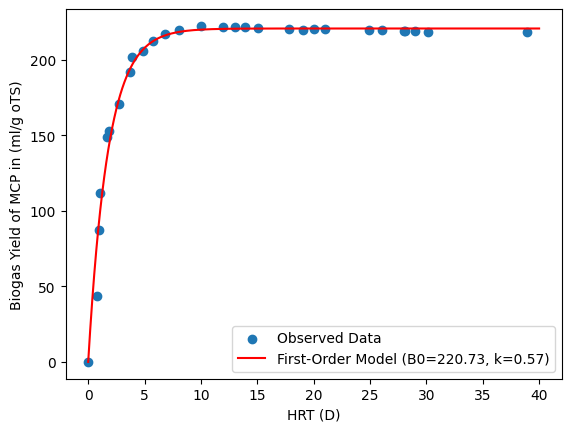

B(t) = 220.73 * (1 - exp(-0.57 * t))
R-squared: 0.980988380952522
RMSE: 7.881493069687241


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# First-order kinetic model function
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))
# Calling data
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Curve fitting to find B0 and k
popt, pcov = curve_fit(first_order_model, t_data, B_data, bounds=([0, 0], [575, 0.75]), maxfev = 50000)
B0, k = popt

# Generate predictions
t_pred = np.linspace(0, 40, 450)
B_pred = first_order_model(t_pred, B0, k)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'First-Order Model (B0={B0:.2f}, k={k:.2f})', color='red')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of MCP in (ml/g oTS)')
plt.legend()
plt.show()
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
print(model_equation)
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, first_order_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, first_order_model(t_data, *popt)))
print(f"RMSE: {rmse}")



In [18]:
# Applying the modified Gompertz Level

In [19]:
print ("Modified Gompert Model Codes")

Modified Gompert Model Codes


In [20]:
# Importing useful libraries
from scipy.optimize import curve_fit

In [21]:
# Function
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

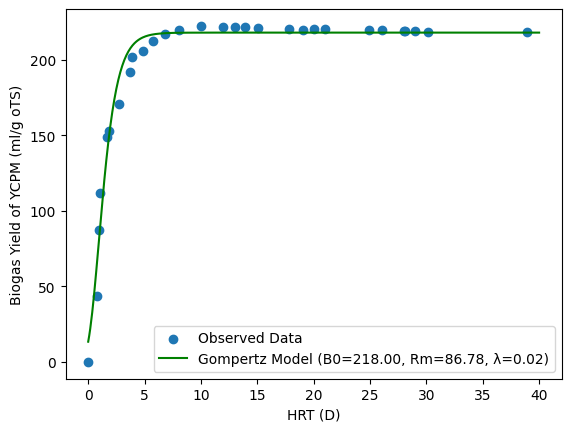

B(t) = 218.00 * exp(-exp((86.78 * e / 218.00) * (0.02 - t) + 1))
R-squared: 0.9778613724228885
RMSE: 8.504999522628095


In [22]:
# Data Description
# HRT as Independent Variable
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
data = data
cleaned_data = data.dropna()
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values
# Biogas Yield as Depedent Variable: Biogas Yield of HM (ml/g oTS)
# Applying the fit
popt, pcov = curve_fit(gompertz_model, t_data, B_data, bounds=(0, [450, 100, 7]), maxfev = 50000)
B0, Rm, lambda_ = popt
# Generate predictions
t_pred = np.linspace(0, 40, 450)
B_pred = gompertz_model(t_pred, B0, Rm, lambda_)
# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Gompertz Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of YCPM (ml/g oTS)')
plt.legend()
plt.show()
def model_equation():
    return f'B(t) = {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))'
print(model_equation())
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, gompertz_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, gompertz_model(t_data, *popt)))
print(f"RMSE: {rmse}")

B(t) = (219.40 * (1 - np.exp(-0.76 * t)) + 219.40 * np.exp(-np.exp((70.00 * e / 219.40) * (0.09 + 1))))/2


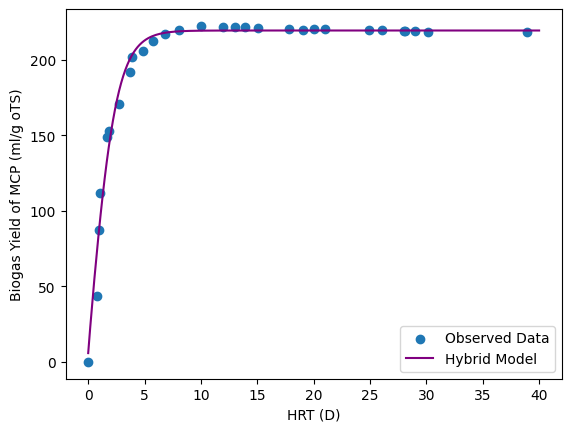


R-squared: 0.9812818207206979
RMSE: 7.82043206283236


In [23]:
# Hybrid model function (blending First-Order and Gompertz)
def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models
def hybrid_model_equation():
    return f'B(t) = 0.5 * ({B0:.2f} * (1 - exp(-{k:.2f} * t)) + {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))))'
#t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Curve fitting for hybrid model
popt, pcov = curve_fit(hybrid_model, t_data, B_data, bounds=(0, [220, 100, 70, 40]), maxfev = 50000)
B0, k, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0,40, 220)
B_pred = hybrid_model(t_pred, B0, k, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Hybrid Model', color='purple')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of MCP (ml/g oTS)')
model_equation = f'B(t) = ({B0:.2f} * (1 - np.exp(-{k:.2f} * t)) + {B0:.2f} * np.exp(-np.exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} + 1))))/2'
print(model_equation)
plt.legend()
plt.show()
print ()
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, hybrid_model(t_data, B0, k, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, hybrid_model(t_data, B0, k, Rm, lambda_)))
print(f"RMSE: {rmse}")

In [25]:
# Logistic growth model for HM

B(t) = 218.41 / (1 + np.exp((4 * 70.00 / 218.41) * (0.00 - t) + 2))


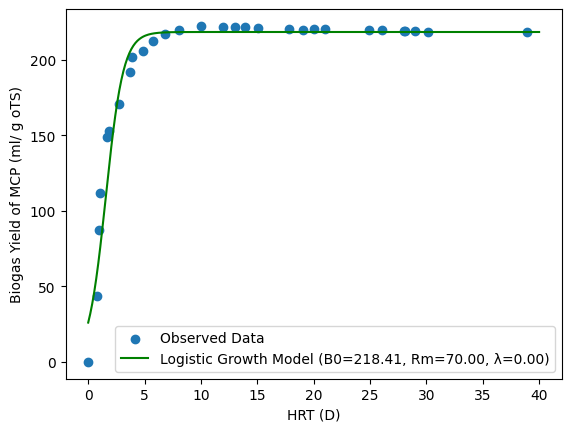

R-squared: 0.9520392435243428
RMSE: 12.518202095668311


In [26]:
# Logistic growth model function
def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))
def logistic_growth_model_equation():
    return f'B(t) = {B0:.2f} / (1 + np.exp((4 * {Rm:.2f} / {B0:.2f}) * ({lambda_:.2f} - t) + 2))'

# Calling data
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Curve fitting to find B0, Rm, and lambda_
popt, pcov = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [450, 70, 14]))
B0, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0, 40, 450)
B_pred = logistic_growth_model(t_pred, B0, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Logistic Growth Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of MCP (ml/ g oTS)')
print (logistic_growth_model_equation())
plt.legend()
plt.show()
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, logistic_growth_model(t_data, B0, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data,  logistic_growth_model(t_data, B0, Rm, lambda_)))
print(f"RMSE: {rmse}")


In [27]:
# Come to this and actually see how you can rather better it and validate

In [28]:
# Modelling Biogas Yield of MCP using Hybrid'' Modelling

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# 1. First-order kinetic model
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

# 2. Modified Gompertz model
def modified_gompertz_model(t, A, mu, lag):
    return A * np.exp(-np.exp(mu * np.exp(1) * (lag - t) / A + 1))

# 3. Two-phase model (example - adjust based on your specific implementation)
def two_phase_model(t, B0_1, k_1, B0_2, k_2, t_switch):
    result = np.zeros_like(t, dtype=float)
    result[t <= t_switch] = first_order_model(t[t <= t_switch], B0_1, k_1)
    result[t > t_switch] = first_order_model(t[t > t_switch] - t_switch, B0_2, k_2) + result[t <= t_switch][-1]
    return result

# 4. Logistic growth model
def logistic_growth_model(t, A, mu, lag):
    return A / (1 + np.exp(-mu * (t - lag)))

# Hybrid model combining all four models
def hybrid_model(t, B0, k, A_gompertz, mu_gompertz, lag_gompertz,
                   B0_1, k_1, B0_2, k_2, t_switch,
                   A_logistic, mu_logistic, lag_logistic):

    return (first_order_model(t, B0, k) +
            modified_gompertz_model(t, A_gompertz, mu_gompertz, lag_gompertz) +
            two_phase_model(t, B0_1, k_1, B0_2, k_2, t_switch) +
            logistic_growth_model(t, A_logistic, mu_logistic, lag_logistic))


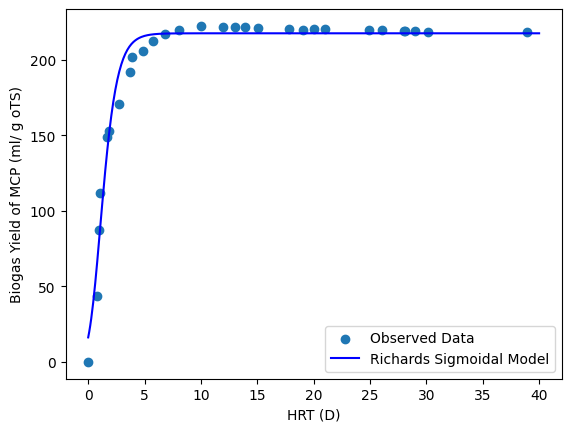

R-squared: 0.9742033756193142
RMSE: 9.180797035825737
B(t) = 217.55 / (1 + np.exp(-1.23 * (t - 0.00)))**(1/0.27)


In [ ]:
# Richards sigmoidal function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Richards sigmoidal function
def richards_model(t, A, mu, lag, v):
    return A / (1 + np.exp(-mu * (t - lag)))**(1/v)

# Function to generate the equation string
def richards_model_equation(A, mu, lag, v):
    return f'B(t) = {A:.2f} / (1 + np.exp(-{mu:.2f} * (t - {lag:.2f})))**(1/{v:.2f})'

# Data
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Curve fitting
popt, pcov = curve_fit(richards_model, t_data, B_data, bounds=(0, [450, 70, 14, 1]))  # Adjust bounds as needed
A, mu, lag, v = popt # Unpack fitted parameters

# Generate predictions
t_pred = np.linspace(0, 40, 450)
B_pred = richards_model(t_pred, *popt)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label='Richards Sigmoidal Model', color='blue')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of MCP (ml/ g oTS)')
plt.legend()
plt.show()

# Evaluate the model
r_squared = r2_score(B_data, richards_model(t_data, *popt))
rmse = np.sqrt(mean_squared_error(B_data, richards_model(t_data, *popt)))

print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")

# Print the equation with fitted parameters
print(richards_model_equation(A, mu, lag, v))

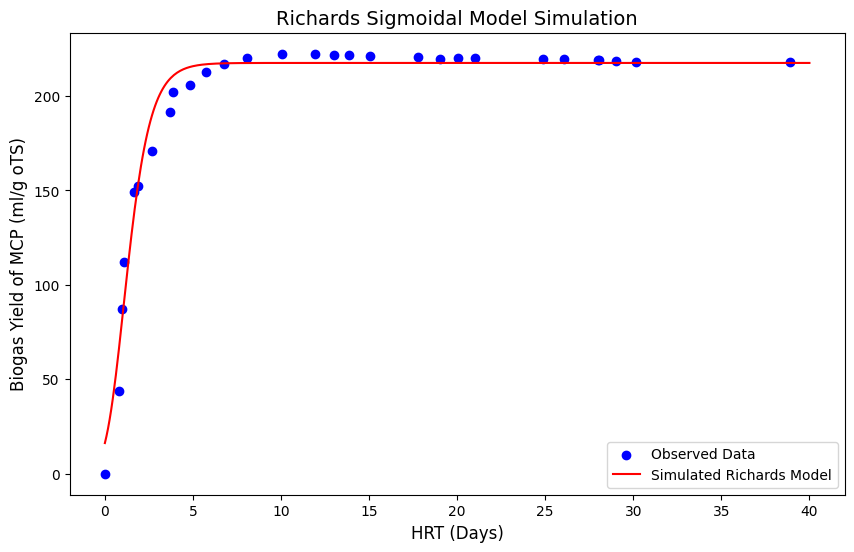

R-squared: 0.9742
RMSE: 9.18 ml/g oTS

Simplified Richards Model Equation:
B(t) = 217.55 / (1 + exp(-1.23 * (t - 0.0)))^(1/0.27)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Richards sigmoidal function
def richards_model(t, A, mu, lag, v):
    return A / (1 + np.exp(-mu * (t - lag)))**(1/v)

# Function to generate the simplified equation string
def simplified_richards_equation(A, mu, lag, v):
    # Round parameters to 2 decimal places for readability
    A = round(A, 2)
    mu = round(mu, 2)
    lag = round(lag, 2)
    v = round(v, 2)

    # Build the simplified equation string
    equation = f"B(t) = {A} / (1 + exp(-{mu} * (t - {lag})))^(1/{v})"
    return equation

# Data
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Curve fitting
popt, pcov = curve_fit(richards_model, t_data, B_data, bounds=(0, [450, 70, 14, 1]))  # Adjust bounds as needed
A, mu, lag, v = popt # Unpack fitted parameters

# --- Simulation ---
# Define the range of HRT values for simulation
t_sim = np.linspace(0, 40, 450)  # Simulate from 0 to 40 days

# Calculate biogas yield predictions using the fitted model
B_sim = richards_model(t_sim, *popt)

# --- Plotting the Simulation ---
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.scatter(t_data, B_data, label='Observed Data', color='blue', marker='o')  # Plot observed data
plt.plot(t_sim, B_sim, label='Simulated Richards Model', color='red', linestyle='-')  # Plot simulated curve

plt.xlabel('HRT (Days)', fontsize=12)  # X-axis label
plt.ylabel('Biogas Yield of MCP (ml/g oTS)', fontsize=12)  # Y-axis label
plt.title('Richards Sigmoidal Model Simulation', fontsize=14)  # Title
plt.legend(fontsize=10)  # Legend
plt.grid(False)  # Add grid for better readability
plt.show()

# --- Evaluation ---
r_squared = r2_score(B_data, richards_model(t_data, *popt))
rmse = np.sqrt(mean_squared_error(B_data, richards_model(t_data, *popt)))

print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.2f} ml/g oTS")

# --- Print the simplified equation ---
print("\nSimplified Richards Model Equation:")
print(simplified_richards_equation(A, mu, lag, v))

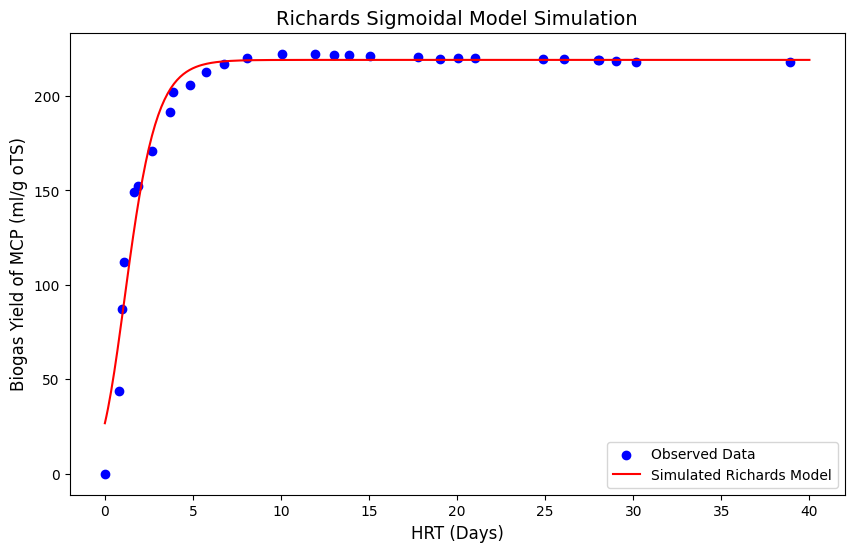

R-squared: 0.9702
RMSE: 9.87 ml/g oTS

Simplified Richards Model Equation:
B(t) = 219.16 / (1 + exp(-1.0 * (t - 0.0)))^(1/0.33)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Richards sigmoidal function
def richards_model(t, A, mu, lag, v):
    return A / (1 + np.exp(-mu * (t - lag)))**(1/v)

# Function to generate the simplified equation string
def simplified_richards_equation(A, mu, lag, v):
    # Round parameters to 2 decimal places
    A = round(A, 2)
    mu = round(mu, 2)
    lag = round(lag, 2)
    v = round(v, 2)

    # Handle negative 0.0
    if mu < 0 and abs(mu) < 1e-10:  # Check if mu is negative and close to zero
        mu = 0.0  # Replace with positive 0.0

    # Build the equation string
    equation = f"B(t) = {A} / (1 + exp(-{mu} * (t - {lag})))^(1/{v})"
    return equation

# Data (Replace with your actual data)
# Assuming 'data' is a pandas DataFrame with columns 'HRT (d)' and 'Biogas Yield of MCP (ml/g oTS)'
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# --- Optimization: Initial Guesses and Bounds ---
initial_guess = [400, 0.3, 6, 0.9]  # Example initial guess - adjust based on your data
bounds = ([0, 0, 0, 0], [500, 1, 15, 2])  # Example bounds - adjust based on your data

# Curve fitting with optimizations
popt, pcov = curve_fit(richards_model, t_data, B_data, p0=initial_guess, bounds=bounds, method='trf')
# Experiment with different methods: 'lm', 'trf', 'dogbox'

# Unpack fitted parameters
A, mu, lag, v = popt

# --- Simulation ---
# Define the range of HRT values for simulation
t_sim = np.linspace(0, 40, 450)  # Simulate from 0 to 40 days

# Calculate biogas yield predictions using the fitted model
B_sim = richards_model(t_sim, *popt)

# --- Plotting the Simulation ---
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.scatter(t_data, B_data, label='Observed Data', color='blue', marker='o')  # Plot observed data
plt.plot(t_sim, B_sim, label='Simulated Richards Model', color='red', linestyle='-')  # Plot simulated curve

plt.xlabel('HRT (Days)', fontsize=12)  # X-axis label
plt.ylabel('Biogas Yield of MCP (ml/g oTS)', fontsize=12)  # Y-axis label
plt.title('Richards Sigmoidal Model Simulation', fontsize=14)  # Title
plt.legend(fontsize=10)  # Legend
plt.show()

# --- Evaluation ---
r_squared = r2_score(B_data, richards_model(t_data, *popt))
rmse = np.sqrt(mean_squared_error(B_data, richards_model(t_data, *popt)))

print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.2f} ml/g oTS")

# --- Print the simplified equation ---
print("\nSimplified Richards Model Equation:")
print(simplified_richards_equation(A, mu, lag, v))



In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Richards sigmoidal function
def richards_model(t, A, mu, lag, v):
    return A / (1 + np.exp(-mu * (t - lag)))**(1/v)

# Jacobian function (calculates the gradient of the Richards model)
def jacobian_richards(params, t):
    A, mu, lag, v = params

# Partial derivative with respect to A
    dA = -2 * np.sum((B_data - richards_model(t, A, mu, lag, v)) /
                      (1 + np.exp(-mu * (t - lag)))**(1/v))

    # Partial derivative with respect to mu
    dmu = 2 * np.sum((B_data - richards_model(t, A, mu, lag, v)) *
                      A * (t - lag) * np.exp(-mu * (t - lag)) /
                      (v * (1 + np.exp(-mu * (t - lag)))**((1/v) + 1)))

    # Partial derivative with respect to lag
    dlag = -2 * np.sum((B_data - richards_model(t, A, mu, lag, v)) *
                       A * mu * np.exp(-mu * (t - lag)) /
                       (v * (1 + np.exp(-mu * (t - lag)))**((1/v) + 1)))

    # Partial derivative with respect to v
    dv = 2 * np.sum((B_data - richards_model(t, A, mu, lag, v)) *
                     A * np.log(1 + np.exp(-mu * (t - lag))) /
                     (v**2 * (1 + np.exp(-mu * (t - lag)))**(1/v)))

    return np.array([dA, dmu, dlag, dv])  # Return the Jacobian matrix

# Data
t_data = data['HRT (d)'].values
B_data = data['Biogas Yield of MCP (ml/g oTS)'].values

# Initial guess
initial_guess = [400, 0.3, 6, 0.9]

# Newton-Raphson iteration
max_iterations = 100
tolerance = 1e-6
params = initial_guess.copy()

for i in range(max_iterations):
    B_pred = richards_model(t_data, *params)
    residuals = B_data - B_pred

    # Calculate the Jacobian matrix
    jacobian = jacobian_richards(params, t_data)

    # Solve for the parameter updates using Gaussian elimination (np.linalg.solve)
    try:
        updates = np.linalg.solve(jacobian, residuals)
    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Iteration stopped.")
        break

    # Update the parameters
    params = params + updates

    # Check for convergence
    if np.max(np.abs(updates)) < tolerance:
        print(f"Converged after {i+1} iterations.")
        break

# Simulation and Plotting (similar to previous responses)
# ...



Singular matrix encountered. Iteration stopped.
